In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./new_df.csv')
df

,value,label
0,반려동물의 종류에 대해서 알고 계신가요,네
1,키우는 반려동물이 있으신가요,네
2,연예인들의 이색 반려견에 대해서 어떻게 아시나요,연예인의 이색 반려 동물에 대해서 저의 제 개인적인 생각은 연예인들이 반려동물을 이...
3,반려동물과의 추억은 어떤 것을 가지고 있으신가요,저는 지금 현재 고양이 세 마리와 강아지 한 마리를 를 키우고 있는데 한 마리 마리...
4,반려동물을 키우기 위한 조건 세 가지가 있다면 어떤 것이 있다고 생각합니까,제가 생각하는 반려동물 키우기 위한 필요한 세 가지는 일단 반려동물을 사랑하는 마음...
...,...,...
25325,다른 과랑 모여서 듣는 교양 수업도 있다고 하셨는데 그렇게 된다면 여러 과 학생이 ...,그거는 교과목에 따라 다른 편인데 교과목에 따라 정원이 정해져 있어요
25326,고등학교 시험은 단순히 시험지를 푸는 것에 그치지만 대학교 시험은 서술형으로 자신의...,보통 중간고사 기말고사가 있고 보 그거는 교수님의 자유로 진행이 돼요
25327,또 고등학교와 대학교의 다른 점이 고등학교에서는 선생님 이라고 부르고 대학교에는 교...,정말 다양한 교수님이 있는데요
25328,어~ 그런 선배들이랑은 오티나 엠티 아니면 술자리에서 친해진다고 들었는데 그렇게 해...,저희 과는 술자리가 굉장히 많은 편이었어요


In [3]:
from konlpy.tag import Okt

# 형태소 분석기

okt = Okt()

In [4]:
# 'value'와 'label' 열의 값들을 문자열로 변환
df['value'] = df['value'].astype(str)
df['label'] = df['label'].astype(str)

# 토큰화
df_token = {}

df_token['token_value'] = df['value'].apply(okt.morphs)
df_token['token_label'] = df['label'].apply(okt.morphs)
df_token = pd.DataFrame(df_token)
df_token

,token_value,token_label
0,"[반려동물, 의, 종류, 에, 대해, 서, 알, 고, 계신가요]",[네]
1,"[키우는, 반려동물, 이, 있으신, 가요]",[네]
2,"[연예인, 들, 의, 이색, 반려견, 에, 대해, 서, 어떻게, 아시나요]","[연예인, 의, 이색, 반려, 동물, 에, 대해, 서, 저, 의, 제, 개인, 적,..."
3,"[반려동물, 과의, 추억, 은, 어떤, 것, 을, 가지, 고, 있으신, 가요]","[저, 는, 지금, 현재, 고양이, 세, 마리, 와, 강아지, 한, 마리, 를, 를..."
4,"[반려동물, 을, 키우기, 위, 한, 조건, 세, 가지, 가, 있다면, 어떤, 것,...","[제, 가, 생각, 하는, 반려동물, 키우기, 위, 한, 필요한, 세, 가지는, 일..."
...,...,...
25325,"[다른, 과, 랑, 모, 여서, 듣는, 교양, 수업, 도, 있다고, 하셨는데, 그렇...","[그거, 는, 교과목, 에, 따라, 다른, 편, 인데, 교과목, 에, 따라, 정원,..."
25326,"[고등학교, 시험, 은, 단순히, 시험지, 를, 푸는, 것, 에, 그치지만, 대학교...","[보통, 중간고사, 기말고사, 가, 있고, 보, 그거, 는, 교수, 님, 의, 자유..."
25327,"[또, 고등학교, 와, 대학교, 의, 다른, 점, 이, 고등학교, 에서는, 선생님,...","[정말, 다양한, 교수, 님, 이, 있는데요]"
25328,"[어, ~, 그런, 선배, 들, 이랑은, 오, 티나, 엠티, 아니면, 술자리, 에서...","[저희, 과는, 술자리, 가, 굉장히, 많은, 편이었어요]"


In [5]:
# 토크나이즈된 단어 모음집 생성
all_tokens = []
for tokens in df_token['token_value'].tolist() + df_token['token_label'].tolist():
    all_tokens.extend(tokens)

# 유니크한 단어 목록 생성
unique_tokens = list(set(all_tokens))

# 특별 토큰들을 목록에 추가
unique_tokens = ['<SOS>', '<EOS>', '<UNKNOWN>'] + unique_tokens

# 인티저 맵핑
token2int = {token: idx for idx, token in enumerate(unique_tokens)}

print(token2int)  # 인티저 맵핑 출력


{'<SOS>': 0, '<EOS>': 1, '<UNKNOWN>': 2, '성': 3, '드신': 4, '물질': 5, '내리막': 6, '약': 7, '방송인': 8, '신문배달': 9, '범': 10, '쉬워요': 11, '올라오면서': 12, '다쳤거나': 13, '애국심': 14, '습보': 15, '됐더라': 16, '아니었어가지고': 17, '해서만': 18, '줬을': 19, '가는구나': 20, '26년': 21, '돌려서': 22, '잡아들일려고': 23, '풀었으면': 24, '들다가도': 25, '필통': 26, '사녹': 27, '팠다면은': 28, '꿇고': 29, '마개': 30, '봅니까': 31, '텐데요': 32, '리플': 33, '싶으시고': 34, '꾸신': 35, '자르는': 36, '같다면은': 37, '올렸던데': 38, '먹을수록': 39, '좋아했었지만': 40, '미세먼지': 41, '록': 42, '버르장머리': 43, '됐고': 44, '아차': 45, '선선': 46, '도망칠': 47, '괜찮아지면': 48, '뛰어다녀서': 49, '맞으셨던': 50, '만들었고': 51, '막히더라고요': 52, '좀': 53, '먹겠다고': 54, '했다라고': 55, '이루었': 56, '더워': 57, '기왕': 58, '와이랑은': 59, '대책': 60, '다재다능해서': 61, '병사': 62, '뗄': 63, '뒷받침': 64, '조폭': 65, '전대': 66, '주고받나요': 67, '호프': 68, '즐기질': 69, '들어야겠다는': 70, '신기하기도': 71, '잘려': 72, '게을러서': 73, '비슷하면서도': 74, '챙겨주고': 75, '설레는': 76, '들어오지': 77, '쫄데기': 78, '물리시는가': 79, '해줘': 80, '칵테일': 81, '어뗘': 82, '모순': 83, '주의보': 84, '나빠진': 85, '한인타운': 86, '700원': 87, '들려온다': 88

In [6]:
import matplotlib.pyplot as plt

# 토큰화된 단어들의 빈도 세기
all_tokens = []
for tokens in df_token['token_value'].tolist() + df_token['token_label'].tolist():
    all_tokens.extend(tokens)

# 토큰 빈도 계산
token_counter = {}
for token in all_tokens:
    if token in token_counter:
        token_counter[token] += 1
    else:
        token_counter[token] = 1

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/home/pjja2556/.conda/envs/virtual/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumGothic' not found.
/home/pjja2556/.conda/envs/virtual/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumGothic' not found.
/home/pjja

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.


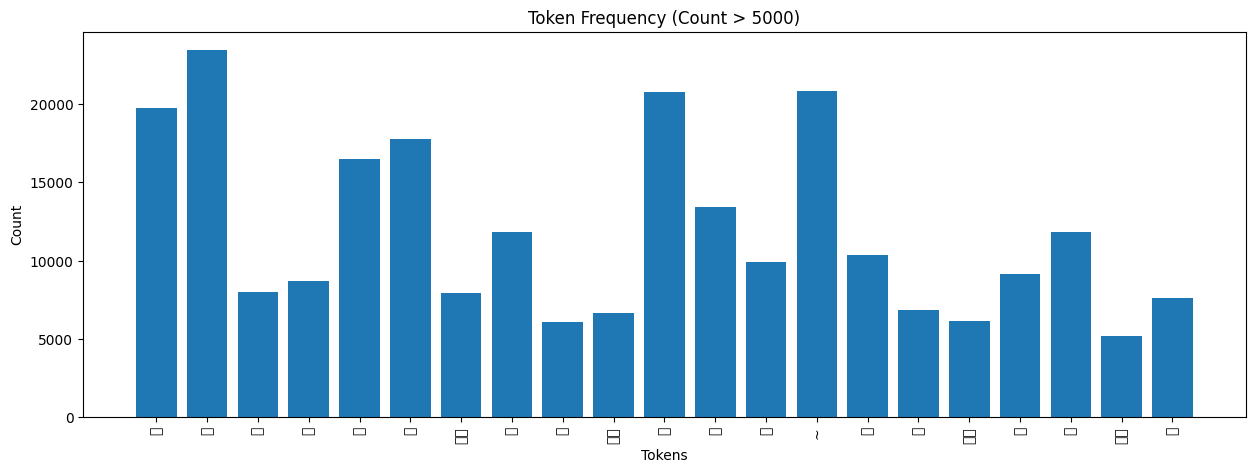

In [7]:
plt.rcParams['font.family'] = 'NanumGothic'

# 토큰과 빈도를 분리하고 빈도수가 5000 이상인 것만 선택
tokens, token_counts = zip(*[(t, c) for t, c in token_counter.items() if c > 5000])

# 바 플롯 그리기
plt.figure(figsize=(15, 5))  # 크기 조절
plt.bar(tokens, token_counts)
plt.title('Token Frequency (Count > 5000)')
plt.xlabel('Tokens')
plt.ylabel('Count')
plt.xticks(rotation=90)  # x축 라벨 회전 (글자 겹침 방지)
plt.show()

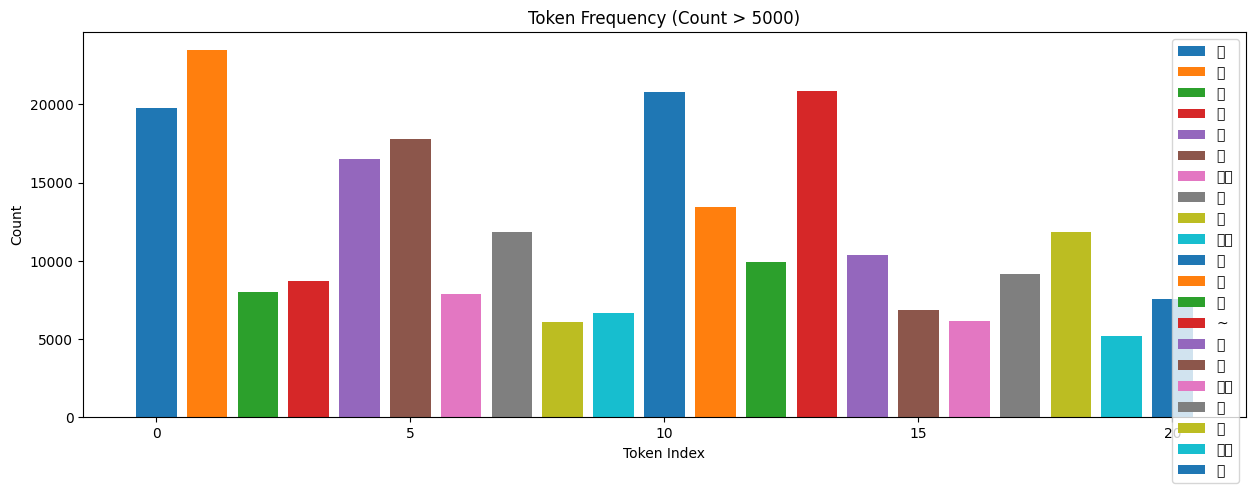

In [11]:
# 토큰과 빈도를 분리하고 빈도수가 5000 이상인 것만 선택
filtered_tokens_counts = [(t, c) for t, c in token_counter.items() if c > 5000]

# 바 플롯 그리기
plt.figure(figsize=(15, 5))  # 크기 조절
for i, (token, count) in enumerate(filtered_tokens_counts):
    plt.bar(i, count, label=token)
plt.title('Token Frequency (Count > 5000)')
plt.xlabel('Token Index')
plt.ylabel('Count')
plt.legend()  # 레전드 추가
plt.show()

In [12]:
for i, (token, count) in enumerate(token_counter.items()):
    if count > 5000:
        print(f'Index: {i}, Token: {token}, Count: {count}')

Index: 3, Token: 에, Count: 19779
Index: 10, Token: 이, Count: 23455
Index: 14, Token: 들, Count: 7976
Index: 21, Token: 은, Count: 8714
Index: 24, Token: 을, Count: 16496
Index: 31, Token: 가, Count: 17804
Index: 34, Token: 생각, Count: 7902
Index: 51, Token: 를, Count: 11855
Index: 57, Token: 때, Count: 6094
Index: 67, Token: 혹시, Count: 6649
Index: 75, Token: 는, Count: 20789
Index: 98, Token: 거, Count: 13446
Index: 99, Token: 어, Count: 9927
Index: 100, Token: ~, Count: 20854
Index: 101, Token: 뭐, Count: 10369
Index: 126, Token: 나, Count: 6827
Index: 134, Token: 그런, Count: 6156
Index: 159, Token: 도, Count: 9143
Index: 203, Token: 그, Count: 11840
Index: 377, Token: 하고, Count: 5196
Index: 542, Token: 저, Count: 7581


In [ ]:
# 빈도수를 기준으로 토큰을 정렬
sorted_tokens = sorted(token_counter.items(), key=lambda x: x[1], reverse=True)

# 빈도수가 5000 이상인 토큰만 선택하여 인덱스와 함께 출력하고, 그래프를 그림
indices, tokens, counts = [], [], []
for i, (token, count) in enumerate(sorted_tokens):
    if count <= 5000:
        print(f'Index: {i}, Token: {token}, Count: {count}')
        indices.append(i)
        tokens.append(token)
        counts.append(count)

# 바 플롯 그리기
plt.figure(figsize=(15, 5))  # 크기 조절
plt.bar(indices, counts)
plt.title('Token Frequency (Count > 5000)')
plt.xlabel('Token Index (Sorted by Count)')
plt.ylabel('Count')
plt.xticks(indices, tokens, rotation=90)  # x축 라벨을 토큰으로 설정하고 회전 (글자 겹침 방지)
plt.show()

Index: 21, Token: 많이, Count: 4969
Index: 22, Token: 이제, Count: 4943
Index: 23, Token: 게, Count: 4907
Index: 24, Token: 에서, Count: 4889
Index: 25, Token: 조금, Count: 4438
Index: 26, Token: 적, Count: 4285
Index: 27, Token: 안, Count: 4206
Index: 28, Token: 한, Count: 4145
Index: 29, Token: 하는, Count: 3972
Index: 30, Token: 것, Count: 3895
Index: 31, Token: 너, Count: 3886
Index: 32, Token: 으로, Count: 3535
Index: 33, Token: 내, Count: 3500
Index: 34, Token: 어떤, Count: 3456
Index: 35, Token: 이런, Count: 3425
Index: 36, Token: 제, Count: 3413
Index: 37, Token: 지금, Count: 3286
Index: 38, Token: 해, Count: 3247
Index: 39, Token: 영화, Count: 3210
Index: 40, Token: 같은, Count: 3191
Index: 41, Token: 아, Count: 3138
Index: 42, Token: 사람, Count: 3085
Index: 43, Token: 의, Count: 3067
Index: 44, Token: 네, Count: 3066
Index: 45, Token: 또, Count: 2972
Index: 46, Token: 이렇게, Count: 2958
Index: 47, Token: 어떻게, Count: 2925
Index: 48, Token: 음, Count: 2892
Index: 49, Token: 잘, Count: 2855
Index: 50, Token: 서, Count:

Index: 0, Token: 이, Token Index in token2int: 19462, Count: 23455
Index: 1, Token: ~, Token Index in token2int: 22012, Count: 20854
Index: 2, Token: 는, Token Index in token2int: 13681, Count: 20789
Index: 3, Token: 에, Token Index in token2int: 23133, Count: 19779
Index: 4, Token: 가, Token Index in token2int: 33890, Count: 17804
Index: 5, Token: 을, Token Index in token2int: 15871, Count: 16496
Index: 6, Token: 거, Token Index in token2int: 25884, Count: 13446
Index: 7, Token: 를, Token Index in token2int: 1449, Count: 11855
Index: 8, Token: 그, Token Index in token2int: 34745, Count: 11840
Index: 9, Token: 뭐, Token Index in token2int: 21559, Count: 10369
Index: 10, Token: 어, Token Index in token2int: 28545, Count: 9927
Index: 11, Token: 도, Token Index in token2int: 24353, Count: 9143
Index: 12, Token: 은, Token Index in token2int: 824, Count: 8714
Index: 13, Token: 들, Token Index in token2int: 14346, Count: 7976
Index: 14, Token: 생각, Token Index in token2int: 34754, Count: 7902
Index: 15, T

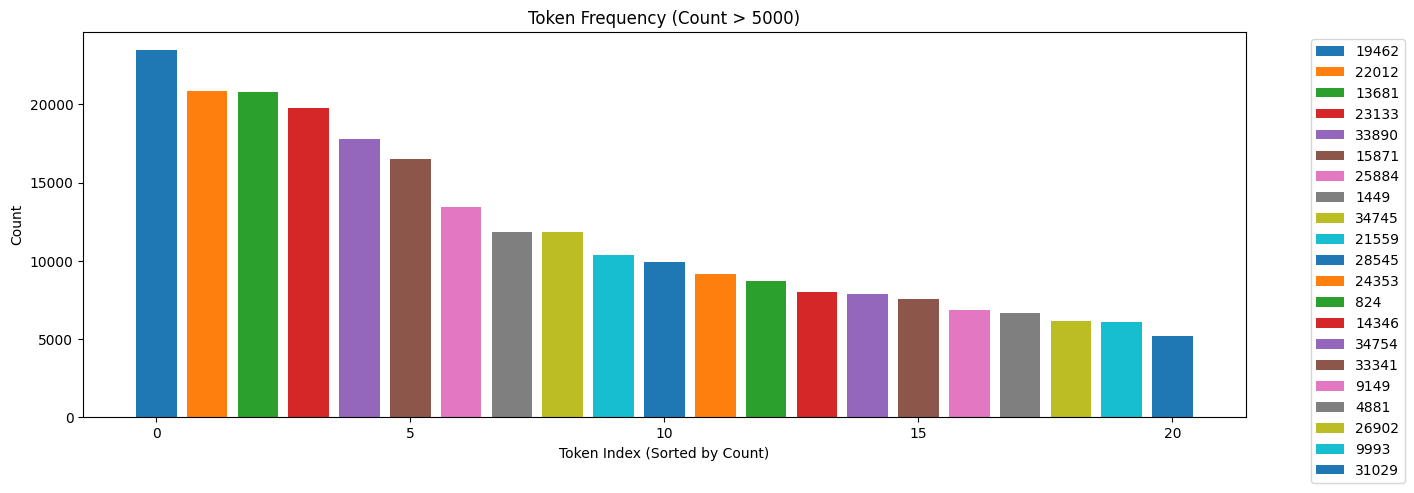

In [14]:
# 빈도수를 기준으로 토큰을 정렬
sorted_tokens = sorted(token_counter.items(), key=lambda x: x[1], reverse=True)

# 빈도수가 5000 이상인 토큰만 선택하여 인덱스와 함께 출력하고, 그래프를 그림
indices, tokens, counts = [], [], []
for i, (token, count) in enumerate(sorted_tokens):
    if count > 5000:
        print(f'Index: {i}, Token: {token}, Token Index in token2int: {token2int[token]}, Count: {count}')
        indices.append(i)  # 순차적인 인덱스를 사용
        tokens.append(token)
        counts.append(count)

# 바 플롯 그리기
plt.figure(figsize=(15, 5))  # 크기 조절
for i in range(len(indices)):
    plt.bar(indices[i], counts[i], label=f'{token2int[tokens[i]]}')  # 레이블을 인티저 매핑만으로 설정
plt.title('Token Frequency (Count > 5000)')
plt.xlabel('Token Index (Sorted by Count)')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 레이블을 이용한 레전드 생성, 그래프 밖에 위치
plt.show()